In [1]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/HP/Documents/9-Master Big Data - Daniela/(MBD-2324) Trabajo Fin de Máster O1/cars_publications.csv')
print(df.shape)
df.head(10)

(20303, 8)


,marca,modelo,año,kilometraje,version,transmision,precio (MXN),ubicacion
0,Kia,Soul,2020,25606,1.6 LX AUTO,Automático,262999,Guadalajara
1,Nissan,Versa,2017,108034,1.6 SENSE AUTO,Automático,160999,Monterrey
2,Kia,Sportage,2018,62842,2.0 EX PACK AUTO,Automático,309999,Querétaro
3,Kia,Seltos,2021,45296,1.6 SX AUTO,Automático,345999,Ciudad de México
4,Renault,Duster,2018,80800,2.0 INTENS,Manual,189999,Ciudad de México
5,Fiat,Mobi,2019,83000,1.0 LIKE,Manual,154999,Ciudad de México
6,Honda,HR-V,2018,41612,1.8 TOURING CVT,Automático,310999,Ciudad de México
7,Nissan,V-Drive,2021,31600,1.6 VDRIVE AC,Manual,213999,Ciudad de México
8,Nissan,Sentra,2018,81000,1.8 ADVANCE AUTO,Automático,201999,Ciudad de México
9,Honda,CR-V,2016,72859,2.4 LX,Automático,266999,Ciudad de México


In [3]:
# Eliminamos valores nulos y duplicados
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(f"Nuevo Dataset shape: {df.shape}")

Nuevo Dataset shape: (16331, 8)


**PREPARACION DE LA DATA PARA EJECUCION DE MODELOS ESTADISTICOS**

In [4]:
# Paso 1: Preparacion de la data
df_regresion = df.copy()

# Identificamos variables categoricas y numericas
categorical_cols = ['marca', 'modelo', 'version', 'transmision', 'ubicacion']
numerical_cols = ['año', 'kilometraje']

# Separamos las variables independientes (X) y la variable dependiente (y)
X = df_regresion.drop(columns=['precio (MXN)'])
y = df_regresion['precio (MXN)']

# Procesamos los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Utilizamos Standard Scaler para las variables numericas
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # Codificamos las variables categoricas con ayuda de OneHotEncoder
    ]
)

X_processed = preprocessor.fit_transform(X)

# Paso 2: dividimos la muestra en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Processed feature matrix shape:", X_processed.shape)

Processed feature matrix shape: (16331, 2441)


**LINEAR REGRESSION**

In [19]:
# Paso 1: Entrenamos el modelo de regresion lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Paso 2: Creamos las predicciones de la variable objetivo
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

# Paso 3: Evaluamos el modelo y calculamos r2
y_pred_linear = model_linear.predict(X_test)
r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)

# Paso 4: Imprimimos resultados
print("Linear Regression Results:")
print(f"Training R² Score: {r2_train_linear:.4f}")
print(f"Training Mean Squared Error: {mse_train_linear:.4f}")
print(f"Testing R² Score: {r2_test_linear:.4f}")
print(f"Testing Mean Squared Error: {mse_test_linear:.4f}")


Linear Regression Results:
Training R² Score: 0.9784
Training Mean Squared Error: 337347867.4483
Testing R² Score: 0.9507
Testing Mean Squared Error: 782839440.9944


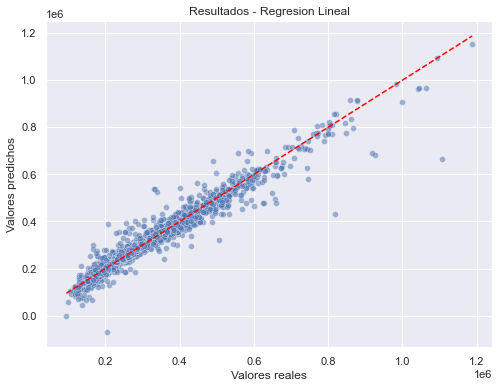

In [20]:
# Graficamos valores reales vs valores predichos del modelo de regresion lineal
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Resultados - Regresion Lineal")
plt.show()

**RANDOM FOREST**

In [12]:
# Paso 1: Inicicalizamos y entrenamos el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Paso 2: Creamos las predicciones de la variable objetivo
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Paso 3: Evaluamos el modelo y calculamos r2
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)


# Paso 4: Imprimimos resultados
print("Random Forest Regression Results:")
print(f"Training R² Score: {r2_train_rf:.4f}")
print(f"Training Mean Squared Error: {mse_train_rf:.4f}")
print(f"Testing R² Score: {r2_test_rf:.4f}")
print(f"Testing Mean Squared Error: {mse_test_rf:.4f}")

Random Forest Regression Results:
Training R² Score: 0.9898
Training Mean Squared Error: 159136207.8590
Testing R² Score: 0.9366
Testing Mean Squared Error: 1005603012.9657


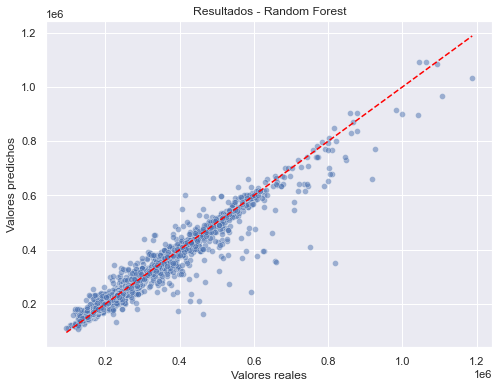

In [13]:
# Graficamos valores reales vs valores predichos del modelo Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Resultados - Random Forest")
plt.show()

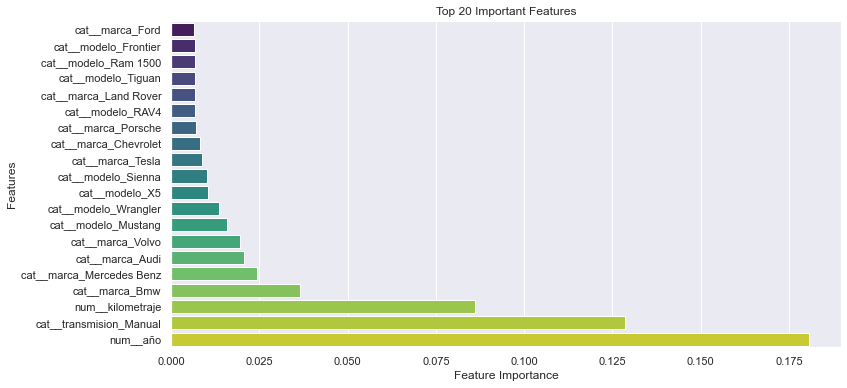

In [14]:
#Calculamos y graficamos importancia de las variables - Modelo Random Forest
feature_names = preprocessor.get_feature_names_out()
importance = rf_model.feature_importances_
sorted_idx = np.argsort(importance)[-20:]

plt.figure(figsize=(12, 6))
sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Important Features")
plt.show()

**DECISION TREE**

#### CALCULAMOS HIPERPARAMETROS OPTIMOS


best mean cross-validation score: 0.884
best parameters: {'max_depth': 50}


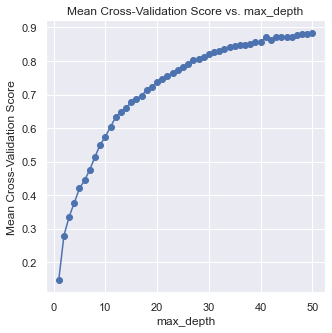

In [5]:
# Paso 1: Con ayuda del grid search calculamos el valor optimo de max_depth iterando en un rango de 1 a 15
max_depth_arr = range(1, 51)
param_grid_1 = {'max_depth': max_depth_arr}

# Paso 2: Creamos el modelo de regresion y validamos
n_folds = 5
tree_reg = DecisionTreeRegressor()
grid_1 = GridSearchCV(estimator=tree_reg, param_grid=param_grid_1, cv=n_folds, scoring='r2')
grid_1.fit(X_train, y_train)
#grid_1.fit(X_train_scaled, Y_train)
print("best mean cross-validation score: {:.3f}".format(grid_1.best_score_))
print("best parameters: {}".format(grid_1.best_params_))

# Paso 3: Graficamos 'max_depth' con los resultados del GridSearchCV
mean_scores = grid_1.cv_results_['mean_test_score']
plt.figure(figsize=(5, 5))
plt.plot(max_depth_arr, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Cross-Validation Score')
plt.grid(True)
plt.show()

best mean cross-validation score: 0.903
best parameters: {'min_samples_leaf': 1}


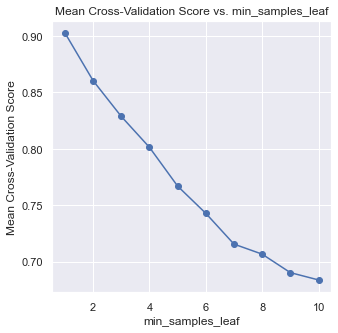

In [6]:
# Paso 4: Con ayuda del grid search calculamos el valor optimo de min_samples_leaf iterando en un rango de 1 a 10
min_samples_leaf_arr = range(1, 11)
param_grid_2 = {'min_samples_leaf': min_samples_leaf_arr}

grid_2 = GridSearchCV(estimator=tree_reg, param_grid=param_grid_2, cv=n_folds, scoring='r2')
grid_2.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_2.best_score_))
print("best parameters: {}".format(grid_2.best_params_))

# Paso 5: Graficamos 'min_samples_leaf' con los resultados del GridSearchCV
mean_scores = grid_2.cv_results_['mean_test_score']
plt.figure(figsize=(5, 5))
plt.plot(min_samples_leaf_arr, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Cross-Validation Score')
plt.grid(True)
plt.show()

best mean cross-validation score: 0.909
best parameters: {'min_samples_split': 4}


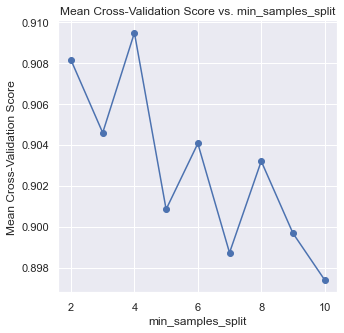

In [7]:
# Paso 6: Con ayuda del grid search calculamos el valor optimo de min_samples_split iterando en un rango de 1 a 10
min_samples_split_arr = range(1, 11)
param_grid_3 = {'min_samples_split': min_samples_split_arr}

grid_3 = GridSearchCV(estimator=tree_reg, param_grid=param_grid_3, cv=n_folds, scoring='r2')
grid_3.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_3.best_score_))
print("best parameters: {}".format(grid_3.best_params_))

# Paso 7: Graficamos 'min_samples_split' con los resultados del GridSearchCV
mean_scores = grid_3.cv_results_['mean_test_score']
plt.figure(figsize=(5, 5))
plt.plot(min_samples_split_arr, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validation Score vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Cross-Validation Score')
plt.grid(True)
plt.show()

In [8]:
# Paso 8: Identificamos los hiper-parametros calculados
min_samples_leaf_best = grid_2.best_params_
max_depth_best = grid_1.best_params_
min_samples_split = grid_3.best_params_
print("Best Parameters:", min_samples_leaf_best,max_depth_best, min_samples_split)

# Paso 9: Entrenamos el modelo con los hiper-parametros optimizados
best_model_dt = DecisionTreeRegressor(**max_depth_best,**min_samples_leaf_best, **min_samples_split)
best_model_dt.fit(X_train, y_train)

# Paso 10: Calculamos la variable Y predecida
y_train_pred_dt = best_model_dt.predict(X_train)
y_test_pred_dt = best_model_dt.predict(X_test)

# Paso 11: Calculamos R2 y MSE, imprimimos resultados
r2_test_dt = r2_score(y_test, y_test_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)

print("Desicion Tree Results:")
print(f"Training R² Score: {r2_train_dt:.4f}")
print(f"Training Mean Squared Error: {mse_train_dt:.4f}")
print(f"Testing R² Score: {r2_test_dt:.4f}")
print(f"Testing Mean Squared Error: {mse_test_dt:.4f}")

Best Parameters: {'min_samples_leaf': 1} {'max_depth': 50} {'min_samples_split': 4}
Desicion Tree Results:
Training R² Score: 0.9682
Training Mean Squared Error: 497327661.6879
Testing R² Score: 0.8944
Testing Mean Squared Error: 1676615735.2424


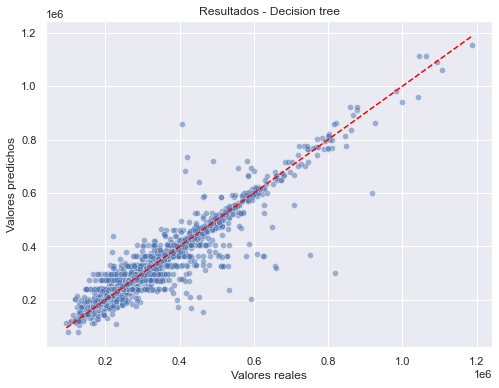

In [10]:
# Graficamos valores reales vs valores predichos del modelo de arboles de decision
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Resultados - Decision tree")
plt.show()

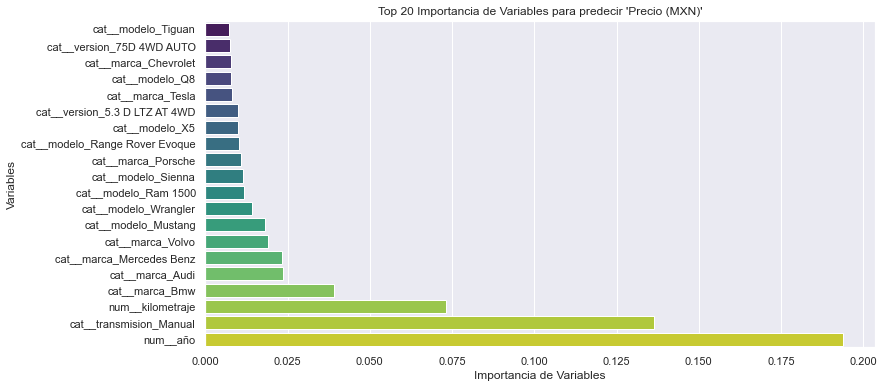

In [15]:
#Obtenemos las variables despues de procesar los datos con One Hot encoder
feature_names = preprocessor.get_feature_names_out()

#Obtenemos la importancia de las variables para el modelo Randam Forest
importance = best_model_dt.feature_importances_

#Ordenamos las variables segun la importancia y graficamos el top 20
sorted_idx = importance.argsort()
sorted_importance = importance[sorted_idx]
sorted_features = feature_names[sorted_idx]


plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importance[-20:], y=sorted_features[-20:], palette="viridis")
plt.xlabel("Importancia de Variables")
plt.ylabel("Variables")
plt.title("Top 20 Importancia de Variables para predecir 'Precio (MXN)'")
plt.show()

**MODELO DE REGRESION DE RIDGE**

In [16]:
# Paso 1: Inicicalizamos el modelo de regresion de Ridge
def ridge_regression(X_train, X_test, y_train, y_test, alpha=1.0):
  
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)

# Paso 2: Creamos las predicciones de la variable objetivo
    y_train_pred_ridge = ridge.predict(X_train)
    y_test_pred_ridge = ridge.predict(X_test)

# Paso 3: Evaluamos el modelo y calculamos r2
    r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
    r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
    mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Paso 4: Imprimimos resultados
    print("Ridge Regression Results:")
    print(f"Training R² Score: {r2_train_ridge:.4f}")
    print(f"Training Mean Squared Error: {mse_train_ridge:.4f}")
    print(f"Testing R² Score: {r2_test_ridge:.4f}")
    print(f"Testing Mean Squared Error: {mse_test_ridge:.4f}")

    return ridge

# Paso 5: Entrenamos y evaluamos el modelo
ridge_model = ridge_regression(X_train, X_test, y_train, y_test, alpha=1.0)


Ridge Regression Results:
Training R² Score: 0.9692
Training Mean Squared Error: 482000214.0927
Testing R² Score: 0.9444
Testing Mean Squared Error: 882715135.2187


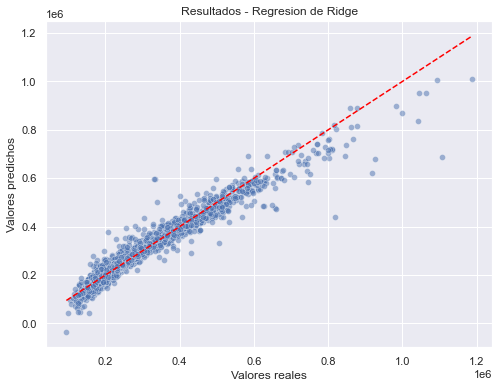

In [17]:
# Graficamos valores reales vs valores predichos del modelo de regresion de Ridge
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred_ridge , alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Resultados - Regresion de Ridge")
plt.show()

**VALIDACION CRUZADA K-FOLDS**

In [21]:
# Definimos los modelos
models = {
    "Linear Regression": model_linear,
    "Random Forest": rf_model,
    "Decision Tree": best_model_dt,
    "Ridge Regression": ridge_model
}

# Ejecucion de la validacion cruzada con 5 iteraciones (folds)
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_processed, y, cv=5, scoring='r2')
    cv_results[name] = scores

# Creamos un dataframe con los resultados para mejor visualizacion
cv_df = pd.DataFrame(cv_results).T
cv_df.columns = [f"Fold {i+1}" for i in range(5)]
cv_df["Mean R²"] = cv_df.mean(axis=1)
cv_df["Std Dev"] = cv_df.std(axis=1)

# Imprimimos los resultados y los ordenamos por mejor resultado
cv_df_sorted = cv_df.sort_values(by="Mean R²", ascending=False)
print("\nCross-Validation Results:")
print(cv_df_sorted)



Cross-Validation Results:
                     Fold 1    Fold 2    Fold 3    Fold 4    Fold 5   Mean R²  \
Linear Regression  0.934890  0.954081  0.960266  0.968309  0.932468  0.950003   
Ridge Regression   0.932105  0.950062  0.953437  0.957620  0.933825  0.945410   
Random Forest      0.903898  0.945872  0.963539  0.962605  0.910364  0.937256   
Decision Tree      0.851573  0.922914  0.932197  0.931002  0.865718  0.900681   

                    Std Dev  
Linear Regression  0.014092  
Ridge Regression   0.010454  
Random Forest      0.025470  
Decision Tree      0.034759  
